# GRIP @THE SPARKS FOUNDATION 

TASK 2 : Prediction using Unsupervised ML

AUTHOR : Mehar Bhatnagar 

OBJECTIVE : From the given 'IRIS' dataset, predict the Optimum number of Clusters and represent it visually. 


STEP 1 : Importing the Dataset from the given link. 

In [19]:
# import the required liberaries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


In [20]:
fn=pd.read_csv(r"/content/Iris.csv",index_col=0,header=0)

fn

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


STEP 2 : Visualizing our Data

In [21]:
fn.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# Analysis
print(fn.shape)
print(fn.info())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


In [23]:
print(fn.isnull().sum())   # detects the missing values.
fn.describe(include="all")  # generates the descriptive statistices which include the mean, median, mode.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [24]:
y=fn.values[:,:-1]
y

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

STEP 3: Find the optimum numnber of clusters.


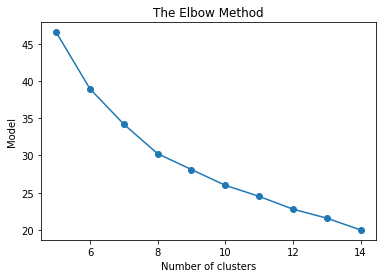

In [25]:
# We use the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

model = []
for i in range(5, 15):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(y)
    model.append(kmeans.inertia_)
plt.plot(range(5, 15), model)
plt.scatter(range(5, 15),model)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Model')
plt.show()

In [26]:
print(model)

[46.53558205128205, 38.93873974358974, 34.198464618714624, 30.23652404612931, 28.115534535639803, 25.996554473304478, 24.51442153679654, 22.797199314574314, 21.591339247353957, 20.00991627816628]


Apply the K-means Cluster on Data 

In [27]:
#fitting K-means to our dataset

kmeans = KMeans(n_clusters = 5, random_state = 10)
Y_pred =  kmeans.fit_predict(y)

#kmeans.fit(x)
#Y_pred =  kmeans.predict(x)

In [28]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 4, 0, 2, 4, 4, 2, 3, 2, 4, 2,
       4, 4, 4, 0, 4, 4, 4, 2, 2, 0, 4, 0, 2, 0, 4, 2, 0, 0, 4, 2, 2, 2,
       4, 0, 0, 2, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0], dtype=int32)

In [29]:
kmeans.n_iter_

4

In [30]:
fn["predicted"]=Y_pred
fn.head() #returns the first n rows of the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [31]:
fn.predicted=fn.predicted.map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
fn.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-versicolor
2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-versicolor
3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-versicolor
4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-versicolor
5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-versicolor


STEP 5 : Visualizing the Cluster 

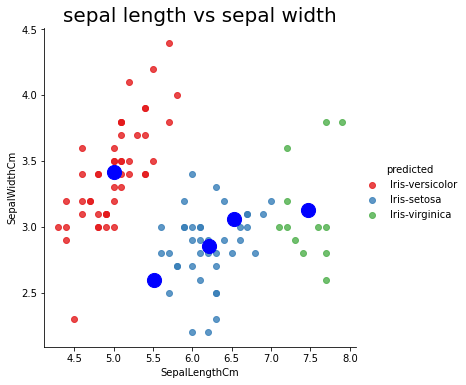

In [34]:
sns.lmplot(data=fn,x="SepalLengthCm", y="SepalWidthCm",
             fit_reg=False, # No regression line
hue="predicted",palette="Set1")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s = 200, c = 'blue')
plt.title('sepal length vs sepal width',size=20)
plt.show()